---
title: "Manipulação e Visualização da Tabela Periódica"
author: "Gustavo J. V. Meira Filho"
format:
    pdf:
        documentclass: scrreprt
        pdf-engine: xelatex
        toc: true
        toc-depth: 3
        include-in-header: 
            text: |
                \usepackage[a4paper,margin=2.5cm]{geometry}
        execute:
            echo: true     
            warning: false   
            message: false 
    html:
        code-fold: true
        code-summary: "Show Code"
        toc: true
        toc-depth: 3
execute:
    fig-format: png       
jupyter: AIChE-Internal-Challenges
---

\newpage
# **Objetivo**

> Introduzir Python, manipulação de dados e visualização.

* <span style="color: #3d9be7ff"><strong>Conceitos de programação:</strong></span> 
  * Tipos básicos (`int`, `float`, `str`, `list`, `dict`)
  * Loops
  * Funções simples.
* <span style="color: #3d9be7ff"><strong>Bibliotecas:</strong></span>  
  * `pandas` (dados tabulares) 
  * `plotly` (visualização gráfica - pode substituir pelo `matplotlib`).
* <span style="color: #3d9be7ff"><strong>Aplicações:</strong></span> 

  * Importar uma base de dados da tabela periódica (existe em CSV no Kaggle).
  * Explorar propriedades como massa atômica, eletronegatividade, número atômico.
  * Criar gráficos (ex.: massa atômica vs número atômico; cores por família).

\newpage
# Bibliotecas e Importações

In [403]:
# Nativas Python
import sys
import os

# Dados Tabulares
import pandas as pd
import numpy as np

# Visualização
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from graphmodex import plotlymodex

import matplotlib.pyplot as plt
import seaborn as sns

In [404]:
# Imagem png ou interativa (notebook)
pio.renderers.default = 'png'

\newpage

# **Pandas**

## Extração

Precisamos extrair a base de dados para conseguir trabalhar em cima dela! Para conseguirmos visualizar e manipular os dados, armazenamos ela como um objeto `pandas` que já possui tratamentos internos para vatorização e é a biblioteca coringa para todas as libs de visualização.

* [Começando na Biblioteca](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)
* [Guia do Usuário](https://pandas.pydata.org/docs/user_guide/index.html)
* [Documentação](https://pandas.pydata.org/docs/reference/index.html)

Note que a tabela periódica é um `.csv` na pasta `data`. Vamos armazenar esses dados em uma DataFrame chamada `df`

In [405]:
df = pd.read_csv(r'..\data\elementdatavalues.csv')

# Mostrar as 10 primeiras linhas das 4 primeiras colunas
df[['Name', 'Symbol', 'Atomic_Number', 'Atomic_Weight']].head(10)

,Name,Symbol,Atomic_Number,Atomic_Weight
0,Hydrogen,H,1,1.007940
1,Helium,He,2,4.002602
2,Lithium,Li,3,6.941000
3,Beryllium,Be,4,9.012182
4,Boron,B,5,10.811000
5,Carbon,C,6,12.010700
6,Nitrogen,N,7,14.006700
7,Oxygen,O,8,15.999400
8,Fluorine,F,9,18.998403
9,Neon,Ne,10,20.179700


In [406]:
# Vamos usar isso no futuro!
pivot_df = df[[
    'Name', 'Symbol', 'Atomic_Number', 'Atomic_Weight', 
    'Density', 'Melting_Point', 'Group', 'Period', 'Boiling_Point'
]].copy(deep=True)

In [407]:
# Informações sobre quantidade de inforação e tipo
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           118 non-null    object 
 1   Symbol         118 non-null    object 
 2   Atomic_Number  118 non-null    int64  
 3   Atomic_Weight  117 non-null    float64
 4   Density        95 non-null     float64
 5   Melting_Point  101 non-null    float64
 6   Group          90 non-null     float64
 7   Period         118 non-null    int64  
 8   Boiling_Point  94 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 8.4+ KB


In [408]:
# Principais estatísticas das colunas da tabela
df[['Atomic_Weight', 'Density', 'Melting_Point', 'Critical_Temperature']].describe()

,Atomic_Weight,Density,Melting_Point,Critical_Temperature
count,117.000000,95.000000,101.000000,21.000000
mean,144.876991,7645.567604,1296.574455,963.735238
std,88.495972,5957.801744,883.225454,1000.908102
min,1.007940,0.089900,14.010000,5.190000
25%,65.409000,2545.000000,544.450000,150.870000
50%,140.907650,7140.000000,1204.150000,416.900000
75%,226.000000,10385.000000,1811.150000,1766.000000
max,294.000000,22650.000000,3823.150000,3223.000000


In [409]:
# Colunas iniciais
print(df.shape)
print(df.columns, '\n')

# Aqui, estamos sobrescrevendo nossa tabela
# A partir dessa linha, só essas colunas estarão presentes!
df = df[[
    'Name', 'Symbol', 'Atomic_Number', 'Atomic_Weight', 
    'Density', 'Melting_Point',
]]

# Colunas finais
print(df.shape)
print(df.columns)

(118, 82)
Index(['Name', 'Symbol', 'Atomic_Number', 'Atomic_Weight', 'Density',
       'Melting_Point', 'Boiling_Point', 'Phase', 'Absolute_Melting_Point',
       'Absolute_Boiling_Point', 'Critical_Pressure', 'Critical_Temperature',
       'Heat_of_Fusion', 'Heat_of_Vaporization', 'Heat_of_Combustion',
       'Specific_Heat', 'Adiabatic_Index', 'Neel_Point',
       'Thermal_Conductivity', 'Thermal_Expansion', 'Density_Liquid',
       'Molar_Volume', 'Brinell_Hardness', 'Mohs_Hardness', 'Vickers_Hardness',
       'Bulk_Modulus', 'Shear_Modulus', 'Young_Modulus', 'Poisson_Ratio',
       'Refractive_Index', 'Speed_of_Sound', 'Valence', 'Electronegativity',
       'ElectronAffinity', 'Autoignition_Point', 'Flashpoint',
       'DOT_Hazard_Class', 'DOT_Numbers', 'EU_Number', 'NFPA_Fire_Rating',
       'NFPA_Health_Rating', 'NFPA_Reactivity_Rating', 'RTECS_Number',
       'Alternate_Names', 'Block', 'Group', 'Period', 'Electron_Configuration',
       'Color', 'Gas_phase', 'CAS_Number', 'CID_

\newpage

## Manipulação de Dados

Um interesse forte é saber como localizar linhas e colunas específicas, realizar filtros booleanos, lidar com valores ausentes e assim por diante! Aqui, trabalharemos tudo isso.

### Filtros

**Filtrar** valores é algo muito simples mas pode parecer estranho no começo. Existe um método próprio para essas operações no pandas chamado `.query`, mas também podemos fazer isso através de indexação.

In [410]:
df.query("Melting_Point <= 25")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1,1.00794,0.0899,14.01
9,Neon,Ne,10,20.17970,0.9000,24.56


Hummm... aparentemente a temperatura está em Kelvin e não em °C. Podemos usar um conversor de unidades como o que fizemos aula passada na função `.apply(lambda x: convert_temp(x)` para irmos de K -> °C. Mas aqui, para ser mais prático, faremos de uma forma mais simples!

In [411]:
df['Melting_Point'] = round(df['Melting_Point'] - 273.15, 2)

# Vamos visualizar esses átomos
df.query("Melting_Point <= 25").head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1,1.007940,0.0899,-259.14
6,Nitrogen,N,7,14.006700,1.2510,-210.10
7,Oxygen,O,8,15.999400,1.4290,-218.30
8,Fluorine,F,9,18.998403,1.6960,-219.60
9,Neon,Ne,10,20.179700,0.9000,-248.59
16,Chlorine,Cl,17,35.453000,3.2140,-101.50
17,Argon,Ar,18,39.948000,1.7840,-189.30
34,Bromine,Br,35,79.904000,3120.0000,-7.30
35,Krypton,Kr,36,83.798000,3.7500,-157.36
53,Xenon,Xe,54,131.293000,5.9000,-111.80


In [412]:
df.query("Melting_Point <= -200 | Melting_Point >= 3000").head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1,1.007940,0.0899,-259.14
5,Carbon,C,6,12.010700,2260.0000,3550.00
6,Nitrogen,N,7,14.006700,1.2510,-210.10
7,Oxygen,O,8,15.999400,1.4290,-218.30
8,Fluorine,F,9,18.998403,1.6960,-219.60
9,Neon,Ne,10,20.179700,0.9000,-248.59
72,Tantalum,Ta,73,180.947900,16650.0000,3017.00
73,Tungsten,W,74,183.840000,19250.0000,3422.00
74,Rhenium,Re,75,186.207000,21020.0000,3186.00
75,Osmium,Os,76,190.230000,22610.0000,3033.00


In [413]:
df[
    (df["Melting_Point"] <= -200)
    | (df["Melting_Point"] >= 3000)
].head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1,1.007940,0.0899,-259.14
5,Carbon,C,6,12.010700,2260.0000,3550.00
6,Nitrogen,N,7,14.006700,1.2510,-210.10
7,Oxygen,O,8,15.999400,1.4290,-218.30
8,Fluorine,F,9,18.998403,1.6960,-219.60
9,Neon,Ne,10,20.179700,0.9000,-248.59
72,Tantalum,Ta,73,180.947900,16650.0000,3017.00
73,Tungsten,W,74,183.840000,19250.0000,3422.00
74,Rhenium,Re,75,186.207000,21020.0000,3186.00
75,Osmium,Os,76,190.230000,22610.0000,3033.00


O exemplo abaixo mostra um filtro mais complexo e, principalmente, a importância do pré-processamento dos dados. Note que os resultados que eu obtenho ao procurar por letras minúsculas e maiúsculas é diferente! Padronizar tudo minúsculo é uma boa prática na programação. Agora vem uma pergunta, para o nome do composto aplicar um `.lower` é uma boa prática, mas isso também é válido para o símbolo?

In [414]:
df[
    (
        (df["Melting_Point"] <= -200)
        | (df["Melting_Point"] >= 3000)
    )
    & (df['Name'].str.contains("o|h"))
].head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1,1.007940,0.0899,-259.14
5,Carbon,C,6,12.010700,2260.0000,3550.00
6,Nitrogen,N,7,14.006700,1.2510,-210.10
8,Fluorine,F,9,18.998403,1.6960,-219.60
9,Neon,Ne,10,20.179700,0.9000,-248.59
74,Rhenium,Re,75,186.207000,21020.0000,3186.00


In [415]:
df[
    (
        (df["Melting_Point"] <= -200)
        | (df["Melting_Point"] >= 3000)
    )
    & (df['Name'].str.contains("O|H"))
].head(100)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1,1.00794,0.0899,-259.14
7,Oxygen,O,8,15.99940,1.4290,-218.30
75,Osmium,Os,76,190.23000,22610.0000,3033.00


### Pré-Processamento e Localização

Um filtro muito relevante é detectar a presença de valores ausentes `.isna`, além de duplicados, e tratá-los `.fillna`, `replace`, `.dropna`. `.drop_duplicates`.

Isso é importante pois caso nossa intenção seja tratar um modelo de regressão, por exemplo, valores ausentes não podem existir, e valores duplicados podem tendenciar nosso modelo.

In [416]:
# Agora, é possível saber exatamente quais são os valores ausentes
df[df['Density'].isna()].head(5)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
84,Astatine,At,85,210.0,NaN,302.0
86,Francium,Fr,87,223.0,NaN,NaN
94,Americium,Am,95,243.0,NaN,1176.0
98,Einsteinium,Es,99,252.0,NaN,860.0
99,Fermium,Fm,100,257.0,NaN,1527.0


In [417]:
# E também os não ausentes...
df[~df['Density'].isna()].head(5)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1,1.007940,0.0899,-259.14
1,Helium,He,2,4.002602,0.1785,NaN
2,Lithium,Li,3,6.941000,535.0000,180.54
3,Beryllium,Be,4,9.012182,1848.0000,1287.00
4,Boron,B,5,10.811000,2460.0000,2075.00


In [418]:
# Vamos criar um elemento repetido, só para simular e brincar
df.loc[len(df)+1] = np.nan

# Vamos fingir que esse elemento é o Helio 2.0
df.iloc[-1, :] = ['Mentira', 'H', 90, 1, 90, np.nan,]

df.tail(3)

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
116,Ununseptium,Uus,117.0,NaN,NaN,NaN
117,Ununoctium,Uuo,118.0,294.0,NaN,NaN
119,Mentira,H,90.0,1.0,90.0,NaN


In [419]:
# Ok, agora temos dois símbolos H
df.query("Symbol == 'H'")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.00794,0.0899,-259.14
119,Mentira,H,90.0,1.00000,90.0000,NaN


In [420]:
# Só para demonstrar o replace() e o fillna()
df.loc[df["Symbol"] == "H"] = df.loc[df["Symbol"] == "H"].replace(90, np.nan)
df.loc[df["Symbol"] == "H"] = df.loc[df["Symbol"] == "H"].fillna(0)

df.query("Symbol == 'H'")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.00794,0.0899,-259.14
119,Mentira,H,0.0,1.00000,0.0000,0.00


In [421]:
# A importância de especificar a ordem de exclusão
# Veja que aqui a gente não está sobrescrevendo nada
df.drop_duplicates(
    subset='Symbol',
    keep='last'
).query("Symbol == 'H'")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
119,Mentira,H,0.0,1.0,0.0,0.0


In [422]:
df = df.drop_duplicates(
    subset='Symbol',
    keep='first'
)

df.query("Symbol == 'H'")

,Name,Symbol,Atomic_Number,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1.0,1.00794,0.0899,-259.14


Também podemos renomear nossas colunas e converter seus tipos.

In [423]:
# Criando uma cópia profunda
nova_df = df.copy(deep=True)

# Renomeando
nova_df = nova_df.rename(columns={
    'Symbol': 'simbolo',
    'Atomic_Number': 'n'
})

# Convertendo de float para int
nova_df['n'] = nova_df['n'].astype('Int64')
nova_df['Atomic_Weight'] = nova_df['Atomic_Weight'].round(3)

nova_df.head(5)

,Name,simbolo,n,Atomic_Weight,Density,Melting_Point
0,Hydrogen,H,1,1.008,0.0899,-259.14
1,Helium,He,2,4.003,0.1785,NaN
2,Lithium,Li,3,6.941,535.0000,180.54
3,Beryllium,Be,4,9.012,1848.0000,1287.00
4,Boron,B,5,10.811,2460.0000,2075.00


\newpage 

## Análise de Dados

A análise mais simples que temos é baseada em ordenamento `.sort_index` ou `.sort_values`

In [424]:
# Vamos ordenar de outra forma
nova_df.sort_values(by='Density', ascending=False).head(5)

,Name,simbolo,n,Atomic_Weight,Density,Melting_Point
76,Iridium,Ir,77,192.217,22650.0,2466.0
75,Osmium,Os,76,190.230,22610.0,3033.0
77,Platinum,Pt,78,195.078,21090.0,1768.3
74,Rhenium,Re,75,186.207,21020.0,3186.0
92,Neptunium,Np,93,237.000,20450.0,644.0


Uma das ferramentas mais importantes da análise de dados é o agrupamento! podemos usar o `.groupby` para isso.

In [425]:
pd.DataFrame(pivot_df.groupby('Group')[
    'Melting_Point'
] \
.mean() \
.sort_values()).head(5).T

Group,18.0,17.0,1.0,16.0,12.0
Melting_Point,117.54,290.61,298.191667,437.434,507.073333


In [426]:
pd.DataFrame(pivot_df.groupby('Group')[
    'Melting_Point'
] \
.count() \
.sort_index()).head(10).T

Group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Melting_Point,6,6,4,3,3,3,3,3,3,3


In [427]:
# A função de pivoteamento é extremamente importante!
# Aqui no pdf faremos ela somente para alguns grupos!
pivot_df.pivot_table(
    values='Symbol',
    columns='Group',
    index='Period',
    aggfunc='first'
).fillna('-').iloc[:, list(range(0, 7)) + list(range(-7, 0))]

Group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Period,,,,,,,,,,,,,,
1,H,-,-,-,-,-,-,-,-,-,-,-,-,He
2,Li,Be,-,-,-,-,-,-,B,C,N,O,F,Ne
3,Na,Mg,-,-,-,-,-,-,Al,Si,P,S,Cl,Ar
4,K,Ca,Sc,Ti,V,Cr,Mn,Zn,Ga,Ge,As,Se,Br,Kr
5,Rb,Sr,Y,Zr,Nb,Mo,Tc,Cd,In,Sn,Sb,Te,I,Xe
6,Cs,Ba,Lu,Hf,Ta,W,Re,Hg,Tl,Pb,Bi,Po,At,Rn
7,Fr,Ra,Lr,Rf,Db,Sg,Bh,Uub,Uut,Uuq,Uup,Uuh,Uus,Uuo


# **Visualização de Dados**

In [428]:
pivot_df['Melting_Point'] = round(pivot_df['Melting_Point'] - 273.15, 2)
pivot_df['Boiling_Point'] = round(pivot_df['Boiling_Point'] - 273.15, 2)

## Dispersão

Gráficos de dispersão sáo ótimos para visualizações de padrões, séries temporais, correlações e regressões!

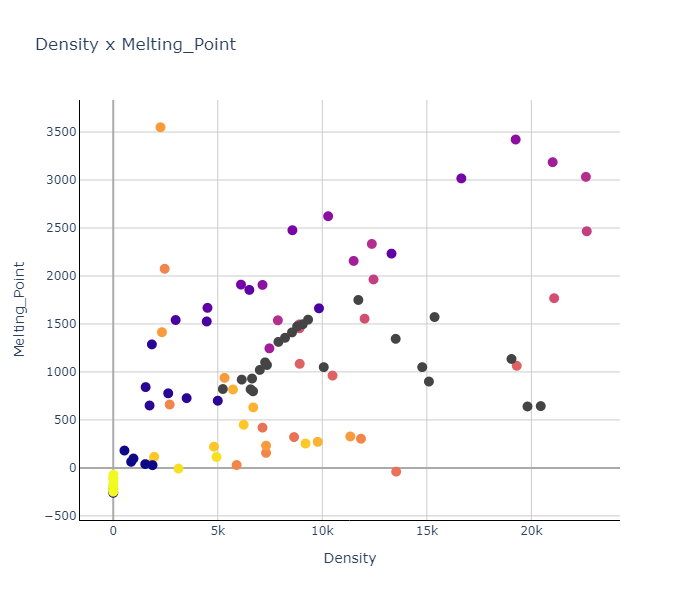

In [429]:
x='Density'
y='Melting_Point'

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=pivot_df.Density, y=pivot_df.Melting_Point,
    mode='markers', showlegend=False,
    marker=dict(
        color=pivot_df.Group, size=10,
    )
))

plotlymodex.main_layout(
    fig, x=x, y=y, title=x+' x '+y
)

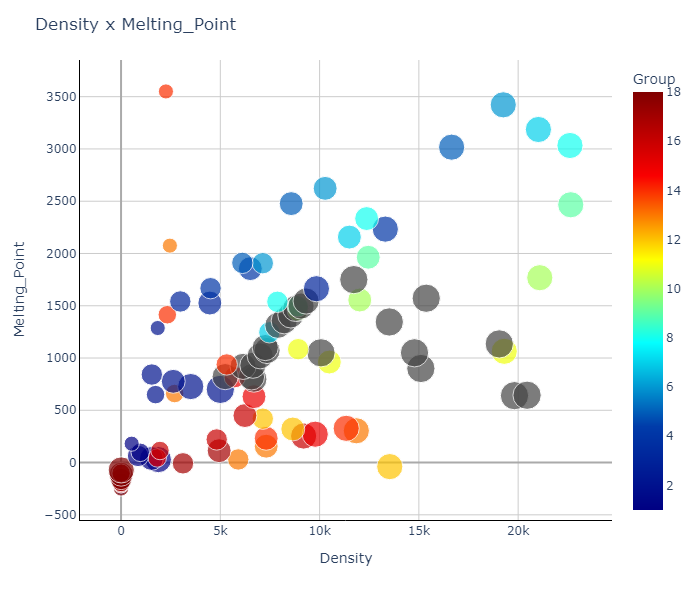

In [430]:
fig = px.scatter(
    pivot_df.sort_values(y), x=x, y=y, color='Group', size='Period',
    color_continuous_scale='jet'
)

plotlymodex.main_layout(
    fig, x=x, y=y, title=x+' x '+y
)

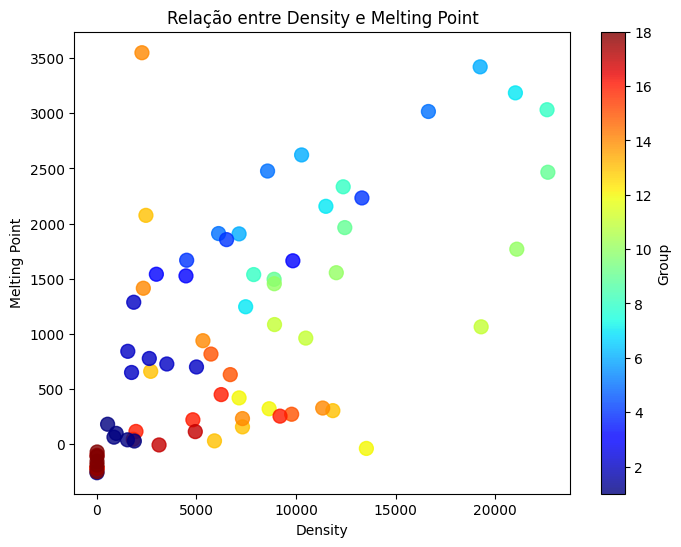

In [431]:
plt.figure(figsize=(8, 6))

# Criar o scatter plot
scatter = plt.scatter(
    pivot_df[x],
    pivot_df[y],
    c=pivot_df['Group'],  # cor por grupo
    s=100,                # tamanho dos pontos
    cmap='jet',           # colormap opcional
    alpha=0.8
)

# Adicionar rótulos e título
plt.xlabel('Density')
plt.ylabel('Melting Point')
plt.title('Relação entre Density e Melting Point')

# Adicionar barra de cores (legenda para o "Group")
plt.colorbar(scatter, label='Group')

plt.show()

\newpage

## Barras

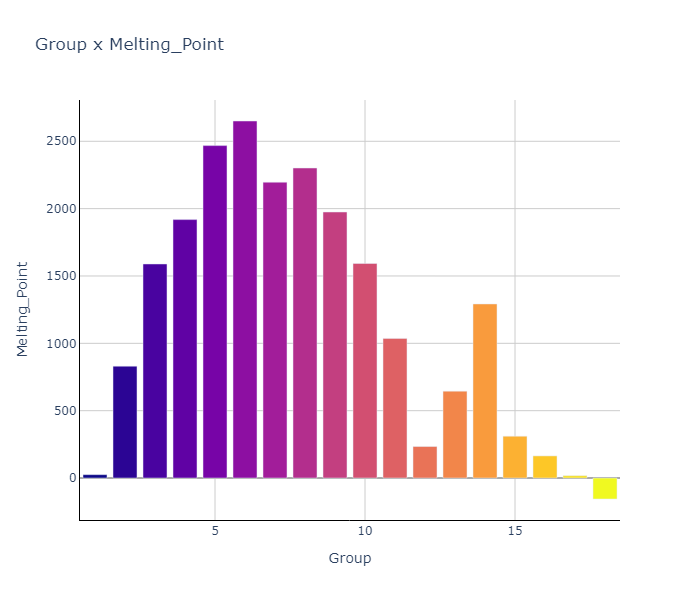

In [432]:
x = 'Group'
y = 'Melting_Point'

barra_df = pivot_df.groupby(x)[y].mean().sort_index()

fig_barra = go.Figure()

fig_barra.add_trace(go.Bar(
    x=barra_df.index, y=barra_df,
    showlegend=False,
    marker=dict(color=barra_df.index)
))

plotlymodex.main_layout(
    fig_barra, x=x, y=y, title=x+' x '+y,
)

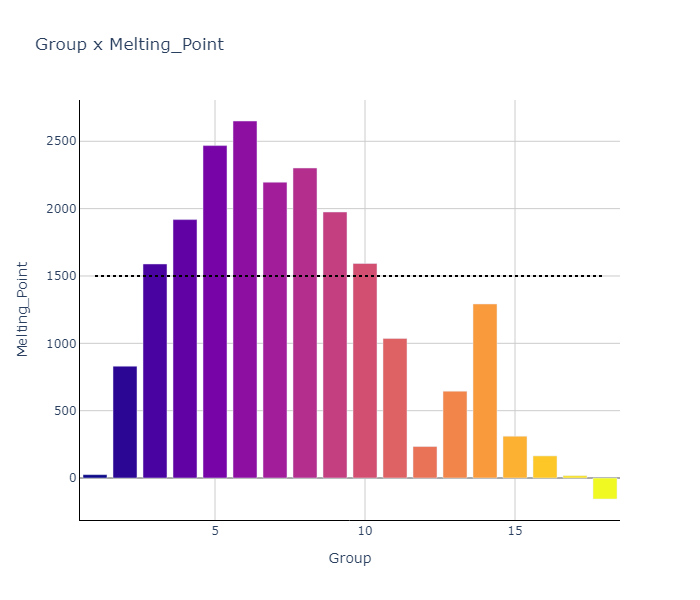

In [433]:
fig_barra.add_trace(go.Scatter(
    x=[1, 18], y=[1500, 1500],
    showlegend=False, mode='lines',
    line=dict(color='black', dash='dot')
))

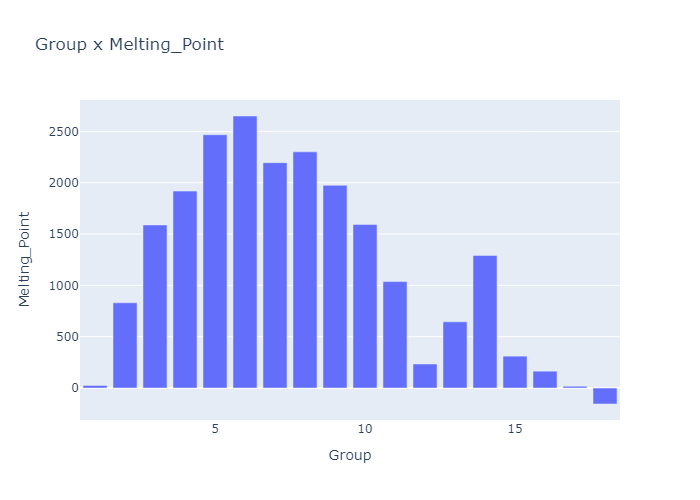

In [434]:
px.bar(barra_df, y=y, title=x+' x '+y)

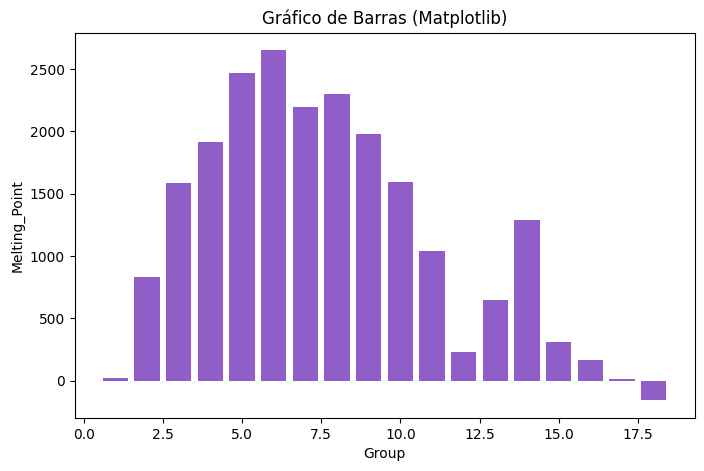

In [435]:
plt.figure(figsize=(8, 5))
plt.bar(barra_df.index, barra_df.values, color="#7336bacc")

plt.xlabel(x)
plt.ylabel(y)
plt.title("Gráfico de Barras (Matplotlib)")
plt.show()

\newpage

## Boxplot

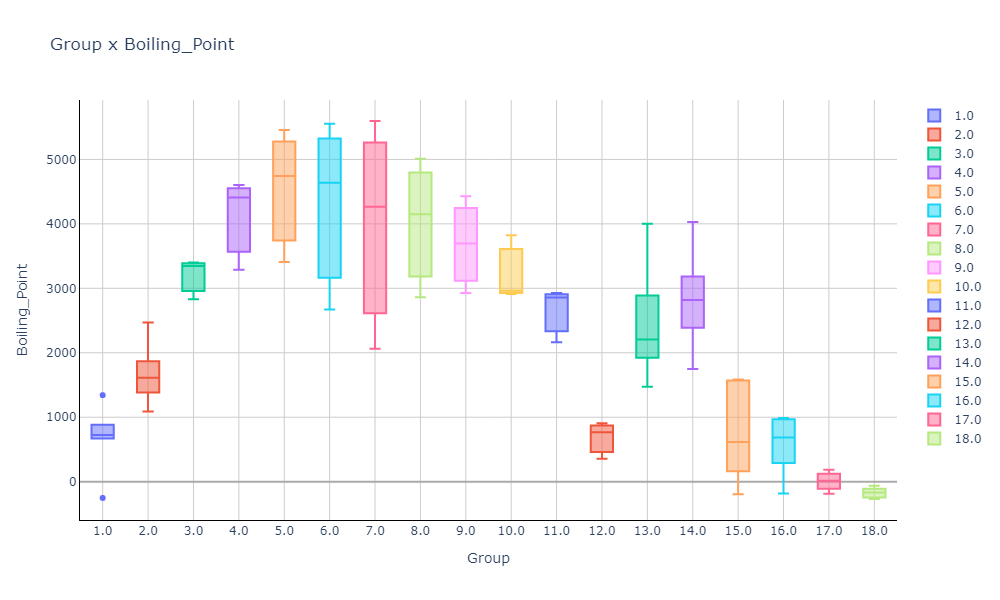

In [436]:
categorias = pivot_df.sort_values('Group')['Group'].unique()
y = 'Boiling_Point'

fig = go.Figure()

for cat in categorias:
    fig.add_trace(go.Box(
        y=pivot_df[pivot_df['Group'] == cat][y],
        name=cat
    ))

plotlymodex.main_layout(
    fig, x=x, y=y, title=x+' x '+y,
    width=1000
)

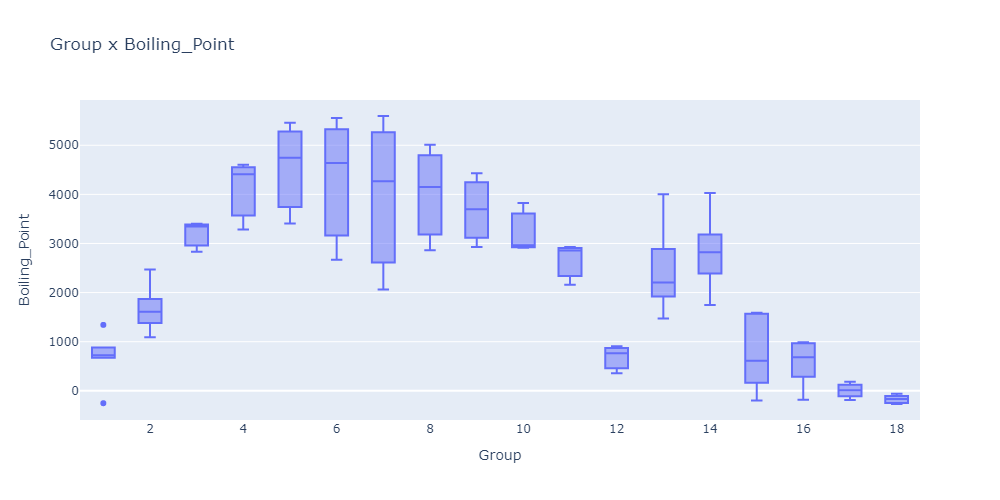

In [437]:
fig = px.box(
    pivot_df, x='Group', y='Boiling_Point',   # eixo Y: valores numéricos
    title='Group x Boiling_Point', width=1000
)

fig.show()

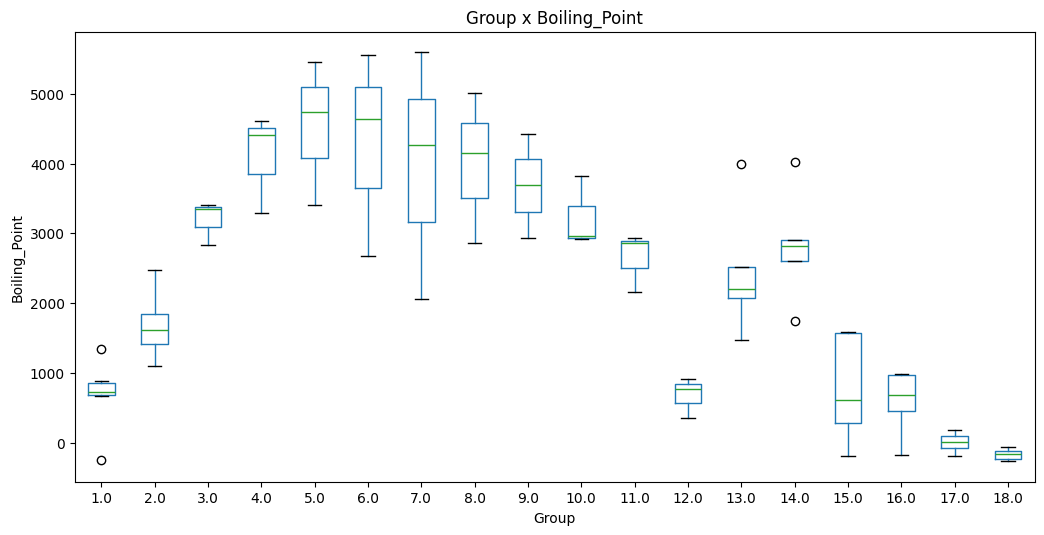

In [438]:
pivot_df.boxplot(column='Boiling_Point', by='Group', grid=False, figsize=(12, 6))
plt.title('Group x Boiling_Point')
plt.suptitle('')  # remove título automático do pandas
plt.xlabel('Group')
plt.ylabel('Boiling_Point')
plt.show()

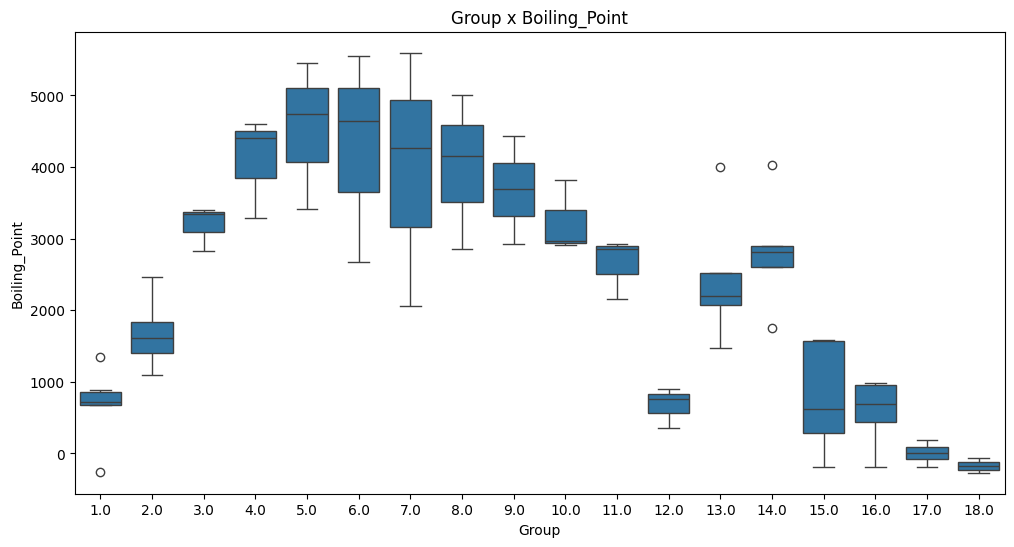

In [439]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pivot_df, x='Group', y='Boiling_Point')
plt.title('Group x Boiling_Point')
plt.xlabel('Group')
plt.ylabel('Boiling_Point')
plt.show()


\newpage

## Heatmap

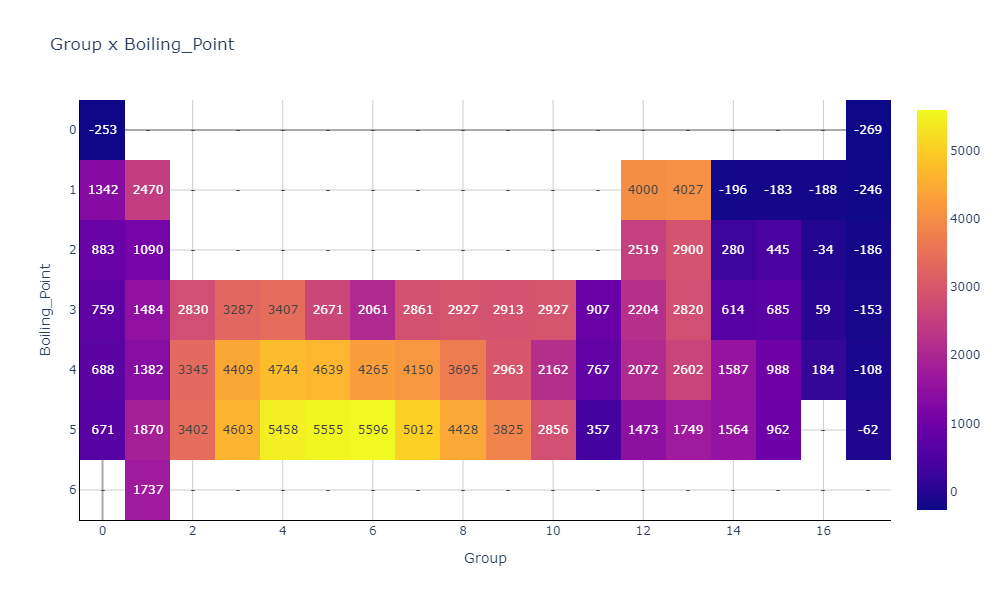

In [454]:
y = 'Boiling_Point'

heatmap_df = pivot_df.pivot_table(
    values=y,
    columns='Group',
    index='Period',
    aggfunc='first'
)

heatmap_df = heatmap_df.round(0).fillna('-')

fig = go.Figure()

fig.add_trace(go.Heatmap(
    z=heatmap_df,
    text=heatmap_df.values,
    texttemplate="%{text}",   # <-- faz o texto aparecer
    textfont={"size": 12},    # opcional: tamanho da fonte
    colorscale="Plasma"      # opcional: paleta de cores
))

plotlymodex.main_layout(
    fig, x=x, y=y, title=x+' x '+y,
    width=1000
)

fig.update_yaxes(autorange='reversed')

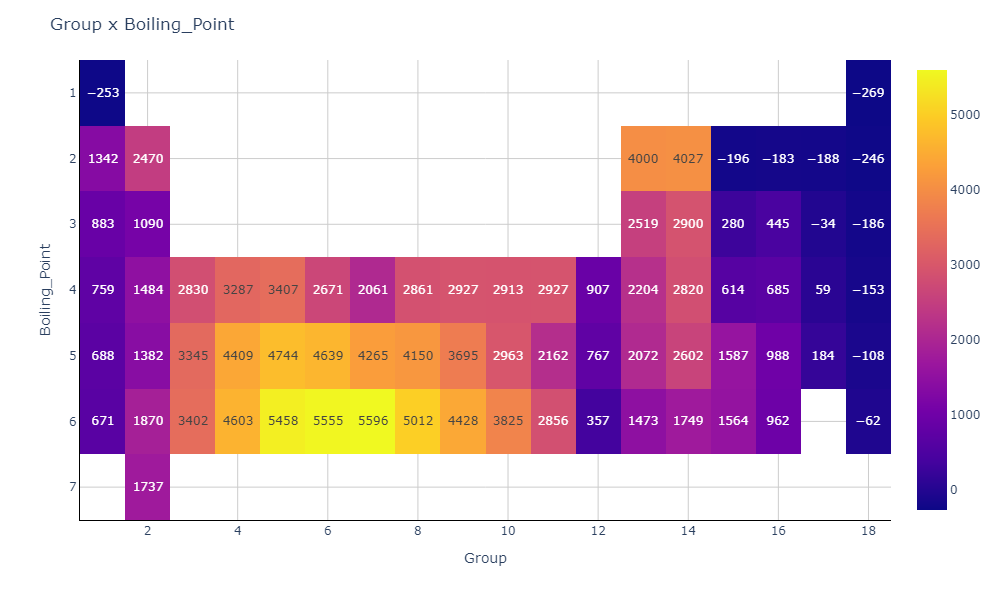

In [456]:
fig = px.imshow(
    heatmap_df,
    text_auto=True,             # mostra os valores automaticamente
    color_continuous_scale='Plasma',
    aspect='auto'               # evita distorções
)

fig.update_yaxes(autorange='reversed')
plotlymodex.main_layout(
    fig, x=x, y=y, title=x+' x '+y,
    width=1000
)